In [1]:
import json
with open(r'D:\Ashwanth\projects\IDP\django_app\idp_app\PaddleOCR-release-2.6\output\ser\xfund_zh\res\infer_results.txt', 'r', encoding="utf-8") as file:
        file_content = file.read()

    # Find the index of the opening brace '{'
        start_index = file_content.find('{')

        # Extract the JSON data
        json_data = file_content[start_index:]

        # Parse the JSON data
        data = json.loads(json_data)


In [2]:
data

{'ocr_info': [{'transcription': 'APR Tool',
   'bbox': [194, 62, 393, 105],
   'points': [[194.0, 62.0], [393.0, 62.0], [393.0, 105.0], [194.0, 105.0]],
   'pred_id': 0,
   'pred': 'O'},
  {'transcription': 'Results',
   'bbox': [192, 138, 319, 181],
   'points': [[192.0, 138.0], [319.0, 138.0], [319.0, 181.0], [192.0, 181.0]],
   'pred_id': 0,
   'pred': 'O'},
  {'transcription': 'Account Information',
   'bbox': [194, 200, 492, 233],
   'points': [[194.0, 200.0], [492.0, 200.0], [492.0, 233.0], [194.0, 233.0]],
   'pred_id': 0,
   'pred': 'O'},
  {'transcription': 'Prepared By',
   'bbox': [192, 257, 329, 291],
   'points': [[192.0, 257.0], [329.0, 257.0], [329.0, 291.0], [192.0, 291.0]],
   'pred_id': 1,
   'pred': 'QUESTION'},
  {'transcription': 'Date',
   'bbox': [420, 255, 477, 291],
   'points': [[420.0, 255.0], [477.0, 255.0], [477.0, 291.0], [420.0, 291.0]],
   'pred_id': 1,
   'pred': 'QUESTION'},
  {'transcription': "Borrower's Name",
   'bbox': [650, 257, 842, 288],
   'po

In [3]:
import math

def calculate_distance(box1, box2):
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2

    box1_center_x = (x1 + x2) / 2
    box1_center_y = (y1 + y2) / 2
    box2_center_x = (x3 + x4) / 2
    box2_center_y = (y3 + y4) / 2

    distance = math.sqrt((box1_center_x - box2_center_x)**2 + (box1_center_y - box2_center_y)**2)
    return distance

def map_answers_to_questions(questions, answers):
    qa_pairs = {}

    for question_text, question_bbox in questions:
        min_distance = float(500)
        closest_answer = None

        for answer_text, answer_bbox in answers:
            if answer_bbox[0] > question_bbox[2] or answer_bbox[1] > question_bbox[3]:
                distance = calculate_distance(question_bbox, answer_bbox)
                print("QUES:",question_text)
                print("ANS:",answer_text)
                print("DIST:",distance)
                if distance < min_distance:
                    min_distance = distance
                    closest_answer = answer_text
                    print("CLOSEANS::",closest_answer)

        if closest_answer:
            qa_pairs[question_text] = closest_answer

    return qa_pairs

title = []
other_text = []
que=[]
ans=[]
if 'ocr_info' in data:
        for item in data['ocr_info']:
            if 'transcription' in item and 'pred' in item:
                text = item['transcription']
                pred = item['pred']
                bbox = item.get('bbox')
                points = item.get('points')
                if pred == 'HEADER':
                    title.append(text)

                elif pred == 'O':
                     other_text.append(text)
                
                elif pred == 'QUESTION':
                     que.append((text, bbox,points))
                     
                elif pred== 'ANSWER':
                     ans.append((text,bbox,points))

# qa_pairs = map_answers_to_questions(que, ans)

In [59]:
import math

def calculate_distance(box1, box2):
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2

    box1_center_x = (x1 + x2) / 2
    box1_center_y = (y1 + y2) / 2
    box2_center_x = (x3 + x4) / 2
    box2_center_y = (y3 + y4) / 2

    distance = math.sqrt((box1_center_x - box2_center_x)**2 + (box1_center_y - box2_center_y)**2)
    return distance

def map_answers_to_questions(questions, answers):
    qa_pairs = {}

    for question_text, question_bbox in questions:
        min_distance = float('inf')
        closest_answer = None
        # print("QUESTION",question_text)
        for answer_text, answer_bbox in answers:
            # print("ANSWER",answer_text)
            if answer_bbox[0] > question_bbox[2] or answer_bbox[1] > question_bbox[3]:
                distance = calculate_distance(question_bbox, answer_bbox)
                # print(distance)
                if distance < min_distance:
                    min_distance = distance
                    closest_answer = answer_text
        # print("CLOSEST",closest_answer)

        if closest_answer:
            qa_pairs[question_text] = closest_answer
        else:
            qa_pairs[question_text] = None
    i=0
    for answer_text, answer_bbox in answers:
        question_found = False

        for question_text, _ in questions:
            if question_text in qa_pairs.keys() and answer_text in qa_pairs.values():
                continue
            else:
                qa_pairs[f'no_key_{i}']=answer_text
                i+=1
                
            


    return qa_pairs



In [109]:
def calculate_horizontal_distance(question_points, answer_points):
    _,p2,_,_ = question_points
    r1,_,_,_ = answer_points

    distance = math.sqrt((r1[0] - p2[0])**2 + (r1[1] - p2[1])**2)
    

    return distance

def calculate_distance(box1, box2):
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2

    box1_center_x = (x1 + x2) / 2
    box1_center_y = (y1 + y2) / 2
    box2_center_x = (x3 + x4) / 2
    box2_center_y = (y3 + y4) / 2

    distance = math.sqrt((box1_center_x - box2_center_x)**2 + (box1_center_y - box2_center_y)**2)
    return distance
def calculate_verti_distance(question_points,answer_points):
    _,_,_,p4 = question_points
    _,r2,_,_ = answer_points

    distance = math.sqrt((r2[0] - p4[0])**2 + (r2[1] - p4[1])**2)
    return distance 
def map_answers_to_questions(questions, answers):
    qa_pairs = {}

    for question_text, question_bbox, question_points in questions:
        min_distance = float('inf')
        closest_answer = None
        print("QUES", question_text)
        print("ques_bboc",question_bbox)
        for answer_text, answer_bbox, answer_points in answers:
            if answer_bbox[0] > question_bbox[2]:
                print("answer_box",answer_bbox)
                print("hori_ans:", answer_text)
                answer_x = answer_points[0][1]
                question_x = question_points[0][1]
                print(answer_x,question_x)
                if abs(answer_x - question_x) < 50:  # Adjust the threshold as needed
                    hori_distance = calculate_horizontal_distance(question_points, answer_points)
                    print("DIST:", hori_distance)
                    if hori_distance < min_distance:
                        min_distance = hori_distance
                        closest_answer = answer_text
                        print("CLOSES", closest_answer)
            elif answer_bbox[1] > question_bbox[3]:
                print("answer_box",answer_bbox)
                print("verti_ans:", answer_text)
                answer_y = answer_points[0][0]
                question_y = question_points[0][0]
                if abs(answer_y - question_y) < 50:  # Adjust the threshold as needed
                    verti_distance = calculate_distance(question_bbox, answer_bbox)
                    print("DIST:", verti_distance)
                    if verti_distance < min_distance:
                        min_distance = verti_distance
                        closest_answer = answer_text
                        print("CLOSES", closest_answer)
            else:
                continue

        print("CLOSES", closest_answer)
        if closest_answer:
            qa_pairs[question_text] = closest_answer
        else:
            qa_pairs[question_text] = None

    i = 0
    for answer_text, answer_bbox, _ in answers:
        for question_text, _, _ in questions:
            if question_text in qa_pairs.keys() and answer_text in qa_pairs.values():
                continue
            else:
                qa_pairs[f'no_key_{i}'] = answer_text
                i += 1
    return qa_pairs


In [110]:
qa_pairs = map_answers_to_questions(que, ans)

# Print the mapped question-answer pairs
for out_questions, out_answers in qa_pairs.items():
    print(f"Question: {out_questions}")
    print(f"Answer: {out_answers}")
    print()

QUES Prepared By
ques_bboc [192, 257, 329, 291]
answer_box [192, 295, 271, 329]
verti_ans: Dianne
DIST: 47.80167361086848
CLOSES Dianne
answer_box [422, 293, 537, 326]
hori_ans: 11/10/2022
293.0 257.0
DIST: 99.72462083156798
answer_box [650, 298, 785, 324]
hori_ans: Swartzlander
298.0 257.0
DIST: 323.60778729814274
answer_box [194, 476, 321, 503]
verti_ans: $108;693.22
DIST: 215.52088065892826
answer_box [192, 538, 324, 572]
verti_ans: $116,149.92
DIST: 281.0111207763849
answer_box [880, 519, 1008, 546]
hori_ans: $110,000.00
519.0 257.0
answer_box [878, 579, 1008, 617]
hori_ans: $108,693.22
584.0 257.0
answer_box [189, 600, 324, 639]
verti_ans: $227,044.92
DIST: 345.52315407219817
answer_box [878, 646, 960, 679]
hori_ans: 5.585%
646.0 257.0
answer_box [194, 672, 285, 698]
verti_ans: 5.5845%
DIST: 411.5361466505707
answer_box [878, 712, 1008, 746]
hori_ans: $116,149.92
712.0 257.0
answer_box [194, 739, 283, 765]
verti_ans: Regular
DIST: 478.50600832173467
answer_box [192, 800, 300, 834]

In [30]:
import cv2

def draw_boxes_on_image(image_path, boxes, output_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Draw bounding boxes on the image
    for label, (x1, y1, x2, y2) in boxes:
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color, thickness=2
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Save the image with bounding boxes
    cv2.imwrite(output_path, image)

In [31]:
image_path = r"C:\Users\100263\Downloads\image_0_processed.png"
boxes = question
output_path = r'C:\Users\100263\Downloads\image_0_processed_final.png'

In [32]:
draw_boxes_on_image(image_path, boxes,output_path)


DEEP DOC DETECT

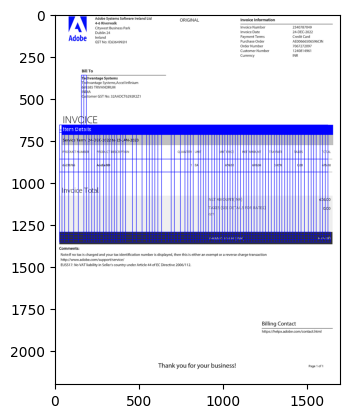

In [16]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import numpy as np
import pytesseract
import pandas as pd

def preprocess(img, f: int):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = Image.fromarray(img)
    en = ImageEnhance.Sharpness(img).enhance(f)
    if img_gray.std() < 30:
        en = ImageEnhance.Contrast(en).enhance(f)
    return np.array(en)

def group_h_line(h_lines, thin_thresh):
    new_h_lines = []

    while len(h_lines) > 0:
        thresh = sorted(h_lines, key=lambda x: x[0][1])[0][0]
        lines = []
        for line in h_lines:
            if thresh[1] - thin_thresh <= line[0][1] <= thresh[1] + thin_thresh:
                lines.append(line)
        lines_ex = []
        for line in h_lines:
            if thresh[1] - thin_thresh > line[0][1] or line[0][1] > thresh[1] + thin_thresh:
                lines_ex.append(line)
        h_lines = lines_ex
        x = []
        for line in lines:
            x.append(line[0][0])
            x.append(line[0][2])
        x_min, x_max = min(x) - 4 * thin_thresh, max(x) + 4 * thin_thresh
        new_h_lines.append([x_min, thresh[1], x_max, thresh[1]])

    return new_h_lines

def group_v_line(v_lines, thin_thresh):
    new_v_lines = []

    while len(v_lines) > 0:
        thresh = sorted(v_lines, key=lambda x: x[0][0])[0][0]
        lines = []
        for line in v_lines:
            if thresh[0] - thin_thresh <= line[0][0] <= thresh[0] + thin_thresh:
                lines.append(line)
        lines_ex = []
        for line in v_lines:
            if thresh[0] - thin_thresh > line[0][0] or line[0][0] > thresh[0] + thin_thresh:
                lines_ex.append(line)
        v_lines = lines_ex
        y = []
        for line in lines:
            y.append(line[0][1])
            y.append(line[0][3])
        y_min, y_max = min(y) - 4 * thin_thresh, max(y) + 4 * thin_thresh
        new_v_lines.append([thresh[0], y_min, thresh[0], y_max])

    return new_v_lines

def seg_intersect(line1, line2):
    point = []
    if line2[0][1] <= line1[0][1]:
        if line1[0][0] <= line2[0][0] <= line1[1][0]:
            return line2[0][0], line1[0][1]
    return None, None

def get_bottom_right(right_point, bottom_point, points):
    for right in right_point:
        for bottom in bottom_point:
            if [right[0], bottom[1]] in points:
                return right[0], bottom[1]
    return None, None

def extract_text_from_cell(cell):
    grayscale = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(grayscale,lang='eng')
    return text.strip()

table_image = cv2.imread(r"C:\Users\100263\Downloads\image_0.png")
table_image = preprocess(table_image, 5)

gray = cv2.cvtColor(table_image, cv2.COLOR_BGR2GRAY)
thresh, image_binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
image_binary = 255 - image_binary

kernel_len = gray.shape[1] // 120
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
img_hor = cv2.erode(image_binary, horizontal_kernel, iterations=3)
hor_line = cv2.dilate(img_hor, horizontal_kernel, iterations=3)

h_lines = cv2.HoughLinesP(hor_line, 1, np.pi / 180, 30)
new_horizontal_lines = group_h_line(h_lines, kernel_len)

kernel_len = gray.shape[1] // 120
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
img_vertical = cv2.erode(image_binary, vertical_kernel, iterations=3)
vertical_line = cv2.dilate(img_vertical, vertical_kernel, iterations=3)

v_lines = cv2.HoughLinesP(vertical_line, 1, np.pi / 180, 30)
new_vertical_lines = group_v_line(v_lines, kernel_len)

points = []
for h_line in new_horizontal_lines:
    x1A, y1A, x2A, y2A = h_line
    for v_line in new_vertical_lines:
        x1B, y1B, x2B, y2B = v_line
        line1 = [np.array([x1A, y1A]), np.array([x2A, y2A])]
        line2 = [np.array([x1B, y1B]), np.array([x2B, y2B])]

        x, y = seg_intersect(line1, line2)
        if x != None:
            if x1A <= x <= x2A and y1B <= y <= y2B:
                points.append([int(x), int(y)])

cells = []
for point in points:
    left, top = point
    right_points = sorted([p for p in points if p[0] > left and p[1] == top], key=lambda x: x[0])
    bottom_points = sorted([p for p in points if p[1] > top and p[0] == left], key=lambda x: x[1])
    right, bottom = get_bottom_right(right_points, bottom_points, points)
    if right and bottom:
        cv2.rectangle(table_image, (left, top), (right, bottom), (0, 0, 255), 2)
        cells.append([left, top, right, bottom])
plt.imshow(table_image)
plt.show()

In [18]:
from huggingface_hub import hf_hub_download
from transformers import AutoImageProcessor, TableTransformerForObjectDetection
import torch
from PIL import Image

file_path = r"C:\Users\100263\Downloads\img.jpg"
image = Image.open(file_path).convert("RGB")

image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
[0621 15:43.24 @_builder.py:182]  INF  Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[0621 15:43.25 @_hub.py:180]  INF  [timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.


Detected table with confidence 0.969 at location [58.27, 231.19, 593.37, 337.23]


In [34]:
from transformers import TableTransformerForObjectDetection

model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")
 

[0621 16:29.13 @_builder.py:182]  INF  Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[0621 16:29.13 @_hub.py:180]  INF  [timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.


In [35]:
import torch

with torch.no_grad():
  outputs = model(**encoding)
     

In [36]:
import matplotlib.pyplot as plt

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(pil_img, scores, labels, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        text = f'{model.config.id2label[label]}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()
     

In [37]:
# rescale bounding boxes
width, height = image.size
results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]
 

In [47]:
print(results)

{'scores': tensor([0.9945, 0.9111]), 'labels': tensor([0, 0]), 'boxes': tensor([[  49.0500,  802.4131, 1638.5637,  912.1796],
        [1056.3397,   70.1363, 1598.3335,  250.1323]])}


In [48]:
bounding_boxes = results['boxes'].tolist()

In [49]:
bounding_boxes

[[49.050048828125, 802.4130859375, 1638.563720703125, 912.1795654296875],
 [1056.3397216796875, 70.13631439208984, 1598.33349609375, 250.13233947753906]]

In [40]:
from PIL import Image

def crop_image(image_path, bounding_box):
    # Open the image
    image = Image.open(image_path)
    
    # Crop the image using the bounding box coordinates
    cropped_image = image.crop(bounding_box)
    
    # Return the cropped image
    return cropped_image


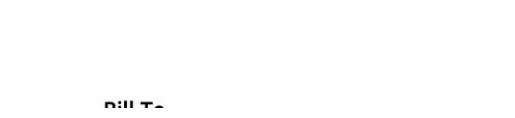

In [50]:
image_path = r"C:\Users\100263\Downloads\image_0.png"
bounding_box = [58.27, 231.19, 593.37, 337.23]  # Example bounding box coordinates

cropped_image = crop_image(image_path, bounding_box)
cropped_image.save('cropped_image.jpg')  # 
import matplotlib.pyplot as plt

# Open the cropped image
cropped_image = Image.open('cropped_image.jpg')

# Display the image
plt.imshow(cropped_image)
plt.axis('off')  # Hide the axis labels
plt.show()


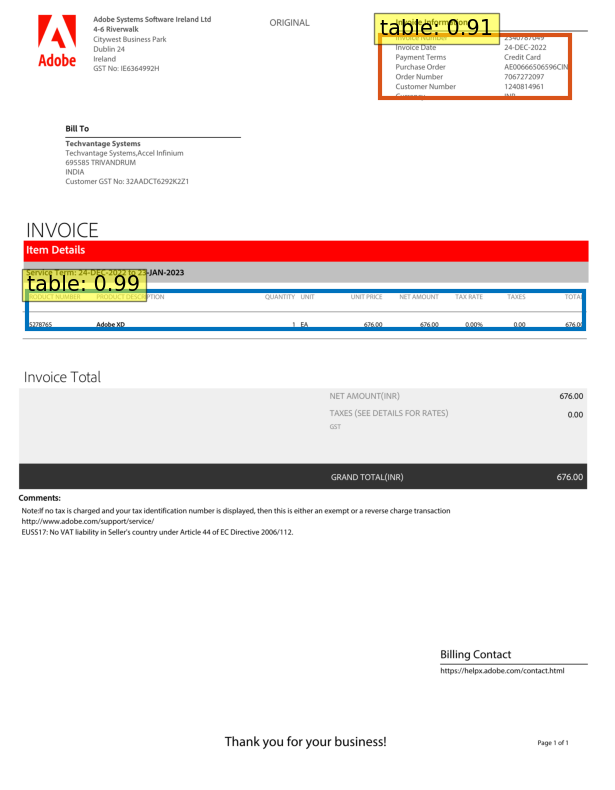

In [38]:
plot_results(image, results['scores'], results['labels'], results['boxes'])


KIE MAPPING

In [21]:
import json
import math

In [79]:
def calculate_horizontal_distance(question_points, answer_points):
    _,p2,_,_ = question_points
    r1,_,_,_ = answer_points

    distance = math.sqrt((r1[0] - p2[0])**2 + (r1[1] - p2[1])**2)
    return distance
    

In [14]:

def calculate_distance(box1, box2):
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2

    box1_center_x = (x1 + x2) / 2
    box1_center_y = (y1 + y2) / 2
    box2_center_x = (x3 + x4) / 2
    box2_center_y = (y3 + y4) / 2

    distance = math.sqrt((box1_center_x - box2_center_x)**2 + (box1_center_y - box2_center_y)**2)
    return distance

In [81]:
def calculate_verti_distance(question_points,answer_points):
    _,_,p3,p4 = question_points
    r1,r2,_,_ = answer_points

    distance = math.sqrt((r1[0] - p3[0])**2 + (r1[1] - p3[1])**2)
    return distance 

In [71]:
def map_answers_to_questions(questions, answers):
    qa_pairs = {}

    for question_text, question_bbox, question_points in questions:
        min_distance = float('inf')
        closest_answer = None
        print("QUES", question_text)
        print("ques_bboc",question_bbox)
        for answer_text, answer_bbox, answer_points in answers:
            if answer_bbox[0] > question_bbox[2]:
                print("answer_box",answer_bbox)
                print("hori_ans:", answer_text)
                answer_x = answer_points[0][1]
                question_x = question_points[0][1]
                # print(answer_x,question_x)
                if abs(answer_x - question_x) < 50:  # Adjust the threshold as needed
                    hori_distance = calculate_horizontal_distance(question_points, answer_points)
                    print("DIST:", hori_distance)
                    if hori_distance < min_distance:
                        min_distance = hori_distance
                        closest_answer = answer_text
                        # print("CLOSES", closest_answer)
            elif answer_bbox[1] > question_bbox[3]:
                print("answer_box",answer_bbox)
                print("verti_ans:", answer_text)
                answer_y = answer_points[0][0]
                question_y = question_points[0][0]
                if abs(answer_y - question_y) < 50:  # Adjust the threshold as needed
                    # verti_distance = calculate_distance(question_bbox, answer_bbox)
                    verti_distance = calculate_verti_distance(question_points,answer_points)
                    print("DIST:", verti_distance)
                    if verti_distance < min_distance:
                        min_distance = verti_distance
                        closest_answer = answer_text
                        # print("CLOSES", closest_answer)
            else:
                continue

        print("CLOSES", closest_answer)
        if closest_answer:
            qa_pairs[question_text] = closest_answer
        else:
            qa_pairs[question_text] = None

    i = 0
    for answer_text, answer_bbox, _ in answers:
        for question_text, _, _ in questions:
            if question_text in qa_pairs.keys() and answer_text in qa_pairs.values():
                continue
            else:
                qa_pairs[f'no_key_{i}'] = answer_text
                i += 1
    return qa_pairs

new

In [130]:

def extract_details(input_txt_path):
    # Read the raw text file
    with open(input_txt_path, 'r', encoding="utf-8") as file:
        file_content = file.read()

    # Find the index of the opening brace '{'
    start_index = file_content.find('{')

    # Extract the JSON data
    json_data = file_content[start_index:]

    # Parse the JSON data
    data = json.loads(json_data)

    title = []
    other_text = []
    que=[]
    ans=[]
    if 'ocr_info' in data:
            for item in data['ocr_info']:
                if 'transcription' in item and 'pred' in item:
                    text = item['transcription']
                    pred = item['pred']
                    bbox = item.get('bbox')
                    points = item.get('points')
                    if pred == 'HEADER':
                        title.append(text)

                    elif pred == 'O':
                        other_text.append(text)
                    
                    elif pred == 'QUESTION':
                        que.append((text, bbox,points))
                        
                    elif pred== 'ANSWER':
                        ans.append((text,bbox,points))
    # print(que,ans)
    qa_pairs = map_answers_to_questions(que, ans)
        

    return other_text, qa_pairs, title


In [137]:
def map_answers_to_questions(questions, answers):
    qa_pairs = {}

    for question_text, question_bbox, question_points in questions:
        min_distance = float('inf')
        closest_answer = None
        # print("QUES", question_text)
        # print("ques_bboc", question_bbox)
        for answer_text, answer_bbox, answer_points in answers:
            if answer_bbox[0] > question_bbox[2]:
                # print("hori_ans:", answer_text)
                answer_x = answer_points[0][1]
                question_x = question_points[0][1]
                # print(answer_x, question_x)
                if abs(answer_x - question_x) < 10:  # Adjust the threshold as needed
                    hori_distance = calculate_horizontal_distance(question_points, answer_points)
                    centre_dist = calculate_distance(question_bbox, answer_bbox)
                    # print("centredist", centre_dist)
                    # print("DIST:", hori_distance)
                    if hori_distance < min_distance:
                        min_distance = hori_distance
                        closest_answer = answer_text
            elif answer_bbox[1] > question_bbox[3]:
                # print("answer_box", answer_bbox)
                # print("verti_ans:", answer_text)
                answer_y = answer_points[0][0]
                question_y = question_points[0][0]
                if abs(answer_y - question_y) < 50 or calculate_distance(question_bbox, answer_bbox) < 200:  # Adjust the threshold as needed
                    verti_distance = calculate_distance(question_bbox, answer_bbox)
                    # print("DIST:", verti_distance)
                    if verti_distance < min_distance:
                        min_distance = verti_distance
                        closest_answer = answer_text
            else:
                continue

        # print("CLOSES", closest_answer)
        if closest_answer:
            qa_pairs[question_text] = closest_answer
        else:
            qa_pairs[question_text] = None
    
    i = 0
    for answer_text, answer_bbox, answer_points in answers:
        is_mapped = False
        for question_text, _, _ in questions:
            if question_text in qa_pairs.keys() and answer_text in qa_pairs.values():
                is_mapped = True
                break
        if not is_mapped:
            below_mapped = False
            for mapped_answer_text in qa_pairs.values():
                print("mapped_answer_text:: ",mapped_answer_text)
            
                if mapped_answer_text == answer_text:
                    break
                else:
                    unmapped_text = answer_text
                    unmapped_bbox = answer_bbox
                    unmapped_points = answer_points
                    

                        
            if below_mapped:
                qa_pairs[question_text] = answer_text
            else:
                qa_pairs[f'no_question_{i}'] = answer_text
                i += 1

    return qa_pairs



In [152]:
def map_answers_to_questions(questions, answers):
    qa_pairs = {}

    for question_text, question_bbox, question_points in questions:
        min_distance = float('inf')
        closest_answer = None
        # print("QUES", question_text)
        # print("ques_bboc", question_bbox)
        for answer_text, answer_bbox, answer_points in answers:
            if answer_bbox[0] > question_bbox[2]:
                # print("hori_ans:", answer_text)
                answer_x = answer_points[0][1]
                question_x = question_points[0][1]
                # print(answer_x, question_x)
                if abs(answer_x - question_x) < 10:  # Adjust the threshold as needed
                    hori_distance = calculate_horizontal_distance(question_points, answer_points)
                    centre_dist = calculate_distance(question_bbox, answer_bbox)
                    # print("centredist", centre_dist)
                    # print("DIST:", hori_distance)
                    if hori_distance < min_distance:
                        min_distance = hori_distance
                        closest_answer = answer_text
            elif answer_bbox[1] > question_bbox[3]:
                # print("answer_box", answer_bbox)
                # print("verti_ans:", answer_text)
                answer_y = answer_points[0][0]
                question_y = question_points[0][0]
                if abs(answer_y - question_y) < 50 or calculate_distance(question_bbox, answer_bbox) < 200:  # Adjust the threshold as needed
                    verti_distance = calculate_distance(question_bbox, answer_bbox)
                    # print("DIST:", verti_distance)
                    if verti_distance < min_distance:
                        min_distance = verti_distance
                        closest_answer = answer_text
            else:
                continue

        # print("CLOSES", closest_answer)
        if closest_answer:
            qa_pairs[question_text] = closest_answer
        else:
            qa_pairs[question_text] = None
    
    i = 0
    for answer_text, answer_bbox, answer_points in answers:
        is_mapped = False
        for question_text, _, _ in questions:
            if question_text in qa_pairs.keys() and answer_text in qa_pairs.values():
                is_mapped = True
                break
        if not is_mapped:
            below_mapped = False
            for mapped_answer_text in qa_pairs.values():
                mapped_answer_bbox = None
                mapped_answer_points = None
                for mapped_answer_text, mapped_answer_bbox, mapped_answer_points in answers:
                    if mapped_answer_text == mapped_answer_text:
                        break
                
                if mapped_answer_bbox[1] > answer_bbox[3]:
                    mapped_answer_y = mapped_answer_points[0][0]
                    answer_y = answer_points[0][0]
                    if abs(mapped_answer_y - answer_y) < 50 or calculate_distance(mapped_answer_bbox, answer_bbox) < 200:  # Adjust the threshold as needed
                        below_mapped = True
                        qa_pairs[question_text] = mapped_answer_text
                        break
            if not below_mapped:
                qa_pairs[f'no_question_{i}'] = answer_text
                i += 1

    return qa_pairs


In [153]:
text , qa_pairs , title = extract_details(r'D:\Ashwanth\projects\IDP\django_app\idp_app\PaddleOCR-release-2.6\output\ser\xfund_zh\res\infer_results.txt')

[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 737.0], [567.0, 777.0], [356.0, 777.0]]
[[356.0, 737.0], [567.0, 

In [151]:
qa_pairs

{'Billto:': 'John Smith',
 'Invoice:': '2021-001',
 'Invoice Date:': '03.01.2021',
 'Due Date:': '03.15.2021',
 'Quantity': '1',
 'Price': '150.00',
 'Amount': '150.00',
 'Amount Paid': '0.00',
 'no_question_0': '442 Swansea Street Denver, cO 80303',
 'no_question_1': 'United States',
 'no_question_2': 'each',
 'no_question_3': '-15.00',
 'no_question_4': '135.00'}

donut test

In [98]:
import re

from transformers import DonutProcessor, VisionEncoderDecoderModel
from datasets import load_dataset
import torch

processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
# load document image
# dataset = load_dataset("hf-internal-testing/example-documents", split="test")
# image = dataset[2]["image"]
# image = r'D:\Ashwanth\projects\IDP\django_app\idp_app\static\in_images\uploaded_image.jpg'
import cv2
image = cv2.imread(r'D:\Ashwanth\projects\IDP\django_app\idp_app\static\in_images\uploaded_image.jpg')
# prepare decoder inputs
task_prompt = "<s_cord-v2>"
decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids

pixel_values = processor(image, return_tensors="pt").pixel_values

outputs = model.generate(
    pixel_values.to(device),
    decoder_input_ids=decoder_input_ids.to(device),
    max_length=model.decoder.config.max_position_embeddings,
    early_stopping=True,
    pad_token_id=processor.tokenizer.pad_token_id,
    eos_token_id=processor.tokenizer.eos_token_id,
    use_cache=True,
    num_beams=1,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
    return_dict_in_generate=True,
)

sequence = processor.batch_decode(outputs.sequences)[0]
sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token
print(processor.token2json(sequence))

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'menu': [{'nm': 'ABC Design 3839 Maxwell Street - Denver. CO 80303', 'unitprice': 'Phone: 303-555-0173', 'price': '2021-001'}, {'nm': 'United States Indoice Date:', 'price': '03.15.2021'}, {'nm': 'Description Quantity Unit Price', 'num': 'Consumption 1', 'price': '150.00'}], 'sub_total': {'subtotal_price': '150.00', 'discount_price': '-15.00', 'tax_price': '135.00'}, 'total': {'total_price': '135.00', 'total_etc': '0.00', 'creditcardprice': '135.00', 'menuqty_cnt': '14'}}


In [ ]:
import tabula

tabula.convert_into(pdf_path, "first_table.csv", output_format="csv", pages='1')

In [1]:
from PIL import Image  # install by > python3 -m pip install --upgrade Pillow  # ref. https://pillow.readthedocs.io/en/latest/installation.html#basic-installation

def img_to_pdf(image_paths):
    images = [
        Image.open(f)
        for f in image_paths
    ]

    pdf_path = "bbd1.pdf"
        
    images[0].save(
        pdf_path, "PDF" ,resolution=100.0, save_all=True, append_images=images[1:]
    )
    return True

In [2]:
import cv2


# Load an image containing a barcode
image_path = r"C:\Users\SANJAY\Downloads\main-qimg-2e2fb70d29d60a37f1bbc9531152015e-lq.jpeg"
image = cv2.imread(image_path)

# Decode the barcode(s) in the image
barcodes = decode(image)

# Extract and print the data from each barcode
for barcode in barcodes:
    data = barcode.data.decode("utf-8")
    print("Barcode Data:", data)


In [50]:
import cv2
import numpy as np
from pyzbar.pyzbar import decode

# Load imgae, grayscale, Gaussian blur, Otsu's threshold
def get_qr(image_path):
    image = cv2.imread(image_path)
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Morph close
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours and filter for QR code
    cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    decoded = []
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        x,y,w,h = cv2.boundingRect(approx)
        area = cv2.contourArea(c)
        ar = w / float(h)
        if len(approx) == 4 and area > 1000 and (ar > .85 and ar < 1.3):
            cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)
            ROI = original[y:y+h, x:x+w]
            decoded.append(decode(ROI)[0].data.decode())
    return "|".join(decoded)


In [51]:
get_qr(r"C:\Users\SANJAY\Downloads\9ccffeac84c5b19e14bab96b9177b18b.jpg")

**************


'<?xml version="1.0" encoding="UTF-8"?>\n<PrintLetterBarcodeData uid="202064629055" name="Ashish Kanti Bhansali" gender="M" yob="1993" co="S/O: Kanti Jain" house="No 17/1 3rd Floor" street="New High School Road" loc="V V Puram" vtc="Bangalore South" po="Basavanagudi" dist="Bengaluru" subdist="Bangalore South" state="Karnataka" pc="560004" dob="25/05/1993"/>'

In [20]:
cnts

(array([[[358, 352]],
 
        [[358, 362]],
 
        [[359, 363]],
 
        [[359, 365]],
 
        [[360, 366]],
 
        [[360, 367]],
 
        [[361, 367]],
 
        [[363, 369]],
 
        [[367, 369]],
 
        [[370, 372]],
 
        [[370, 376]],
 
        [[371, 377]],
 
        [[378, 377]],
 
        [[380, 379]],
 
        [[380, 380]],
 
        [[384, 384]],
 
        [[385, 384]],
 
        [[386, 385]],
 
        [[387, 384]],
 
        [[387, 378]],
 
        [[388, 377]],
 
        [[393, 377]],
 
        [[393, 376]],
 
        [[395, 374]],
 
        [[403, 374]],
 
        [[406, 377]],
 
        [[407, 377]],
 
        [[408, 378]],
 
        [[413, 378]],
 
        [[416, 381]],
 
        [[416, 382]],
 
        [[425, 382]],
 
        [[427, 384]],
 
        [[429, 382]],
 
        [[441, 382]],
 
        [[442, 381]],
 
        [[450, 381]],
 
        [[451, 382]],
 
        [[451, 384]],
 
        [[452, 385]],
 
        [[452, 386]],
 
        [[454, 3

In [12]:
qcd = cv2.QRCodeDetector()
img = cv2.imread(qr_code_path)
retval, decoded_info, points, straight_qrcode = qcd.detectAndDecodeMulti(img)

In [18]:
straight_qrcode

()